# 🦠 COVID-19 Data Analysis & Forecasting

## 📌 Introduction
The COVID-19 pandemic, caused by the SARS-CoV-2 virus, emerged in late 2019 and rapidly spread worldwide, affecting millions of people and disrupting economies, healthcare systems, and daily life.  
Analyzing the spread and impact of COVID-19 helps us understand:
- How the virus evolved over time
- Which regions were most affected
- Recovery and mortality trends
- Potential future case predictions

This project focuses on **exploratory data analysis (EDA)** and **time series forecasting** of COVID-19 cases using the Prophet forecasting model.

---

## 🎯 Objectives
- Perform **data cleaning and preprocessing** of global COVID-19 data.
- Conduct **exploratory analysis** to uncover trends and patterns.
- Compare cases across **countries and WHO regions**.
- Visualize the **geographical spread** of the virus.
- Forecast future cases for WHO regions.

---

## Importing required libraries

In [ ]:
import pandas as pd #DataFrame manipulation

import seaborn as sns #Visualization -I
import matplotlib.pyplot as plt #Visualization -II

import plotly.graph_objects as go #Interactive Visualization -I
import plotly.express as px #Interactive Visualization -II

In [98]:
import warnings
warnings.filterwarnings('ignore') #disabling wanrings

****************

## Data Cleaning

In [4]:
df = pd.read_csv("covid_19_clean_complete.csv", parse_dates=['Date']) #converting to datetime
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [5]:
df.info() #overview

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  14664 non-null  object        
 1   Country/Region  49068 non-null  object        
 2   Lat             49068 non-null  float64       
 3   Long            49068 non-null  float64       
 4   Date            49068 non-null  datetime64[ns]
 5   Confirmed       49068 non-null  int64         
 6   Deaths          49068 non-null  int64         
 7   Recovered       49068 non-null  int64         
 8   Active          49068 non-null  int64         
 9   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


In [6]:
df.drop('Province/State', axis=1, inplace=True) #we wont be working on that column

In [7]:
df.isnull().sum() #clean from missing values

Country/Region    0
Lat               0
Long              0
Date              0
Confirmed         0
Deaths            0
Recovered         0
Active            0
WHO Region        0
dtype: int64

In [8]:
df.duplicated().sum() #no duplicate rows

0

## Static Visualization

---------------------

In [99]:
by_country=  df.groupby('Country/Region')[['Confirmed',	'Deaths',	'Recovered'	,'Active']].sum() #grouping by countries and aggregating the covid cases columns
by_country

,Confirmed,Deaths,Recovered,Active
Country/Region,,,,
Afghanistan,1936390,49098,798240,1089052
Albania,196702,5708,118877,72117
Algeria,1179755,77972,755897,345886
Andorra,94404,5423,69074,19907
Angola,22662,1078,6573,15011
...,...,...,...,...
West Bank and Gaza,233461,1370,61124,170967
Western Sahara,901,63,648,190
Yemen,67180,17707,23779,25694


### Top 10 countries in each metric 

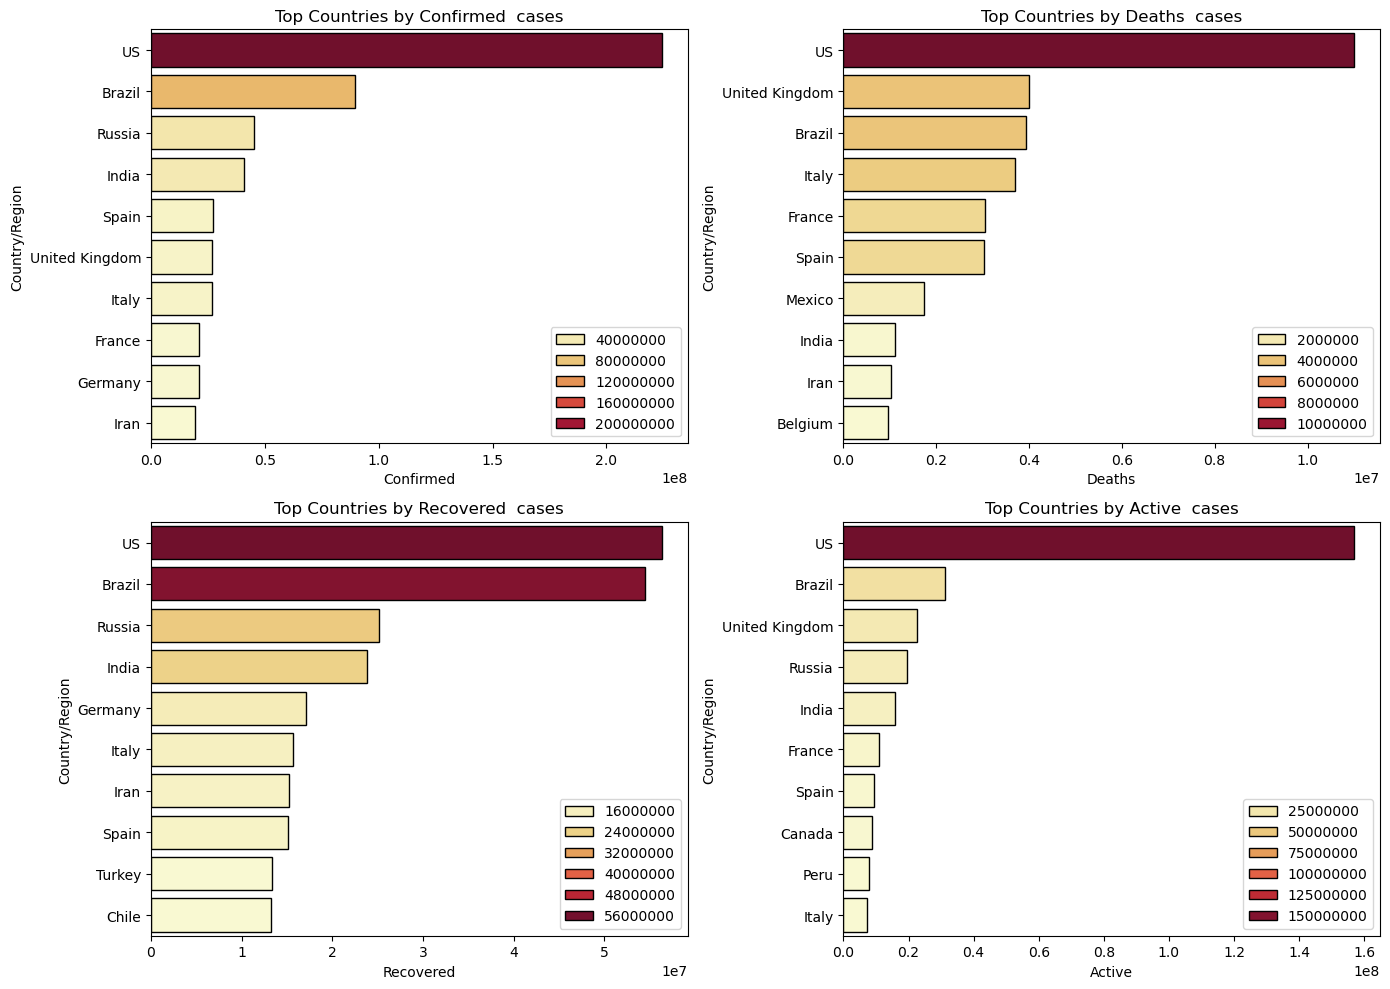

In [10]:
fig, axes = plt.subplots(2,2, figsize=(14,10))

for ax, i in zip(axes.flat, by_country.columns):
    top_data = by_country[i].nlargest(10).reset_index()
    sns.barplot(data=top_data, x=i, y='Country/Region', hue=i, palette='YlOrRd', edgecolor='black', ax=ax)
    ax.set_title(f"Top Countries by {i}  cases")
    ax.legend()
    
plt.tight_layout()
plt.show()


- we can observe that well populated countries US, Brazil, India have high confirmed and active cases
- US is leading in each type of case


-------------------

### Bottom 10 countries in each metric

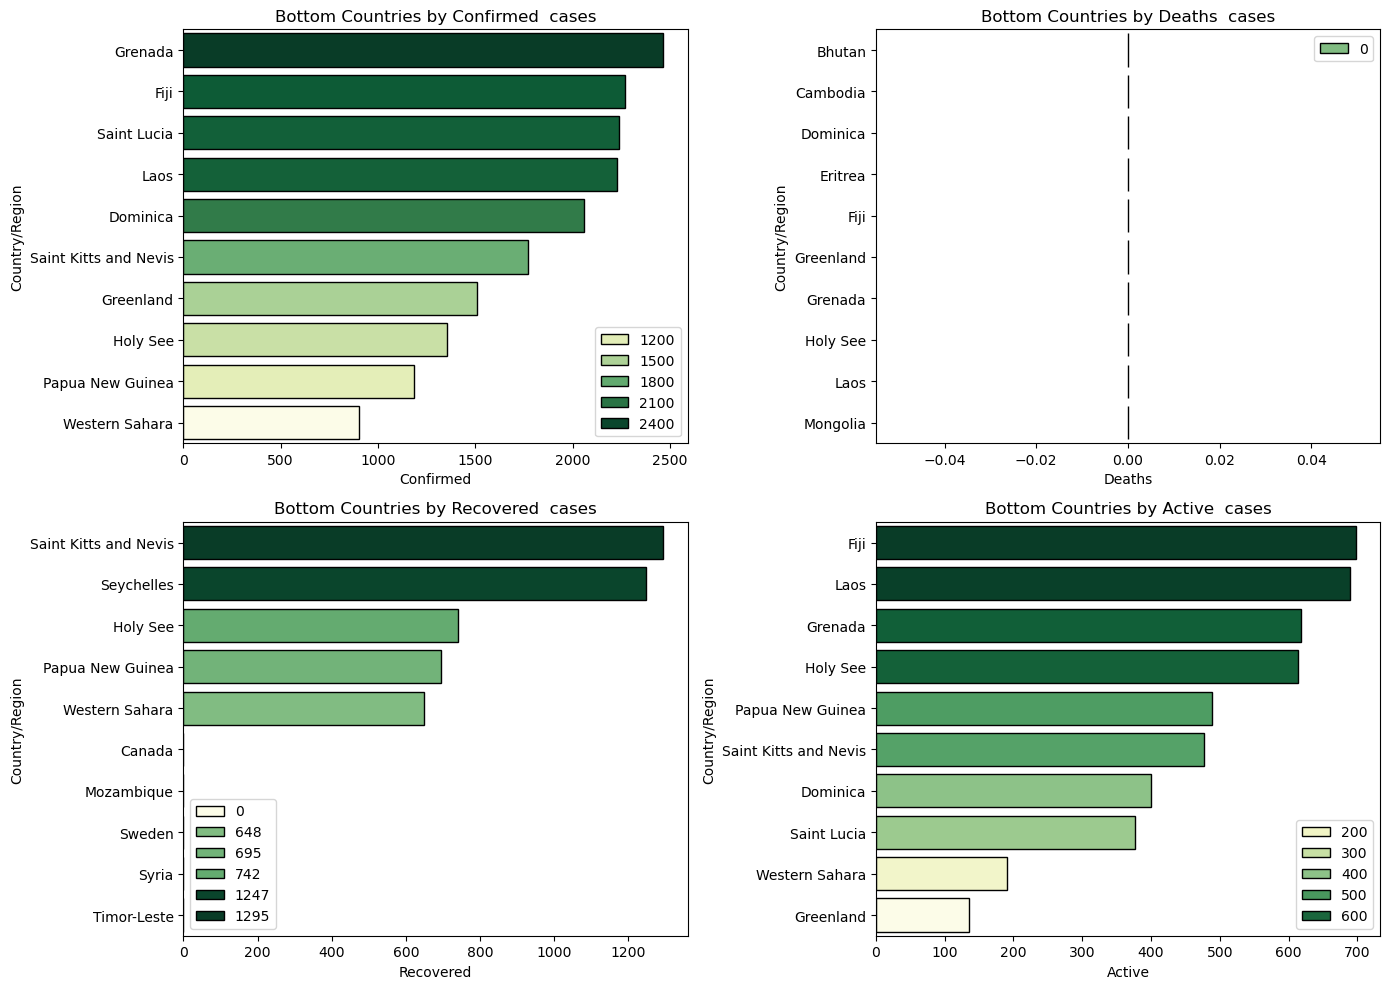

In [11]:
fig, axes = plt.subplots(2,2, figsize=(14,10))

for ax, i in zip(axes.flat, by_country.columns):
    bottom_data = by_country[i].nsmallest(10).sort_values(ascending=False).reset_index()
    sns.barplot(data=bottom_data, x=i, y='Country/Region', hue=i, palette='YlGn', edgecolor='black', ax=ax, order=bottom_data['Country/Region'])
    ax.set_title(f"Bottom Countries by {i}  cases")
    ax.legend()
    
plt.tight_layout()
plt.show()


- The countries at the bottom of the list have next to no cases in 7 months
- In contrast to the top 10, these countries have very low population density

-------------------

### Trend of confirmed cases in WHO Regions. 

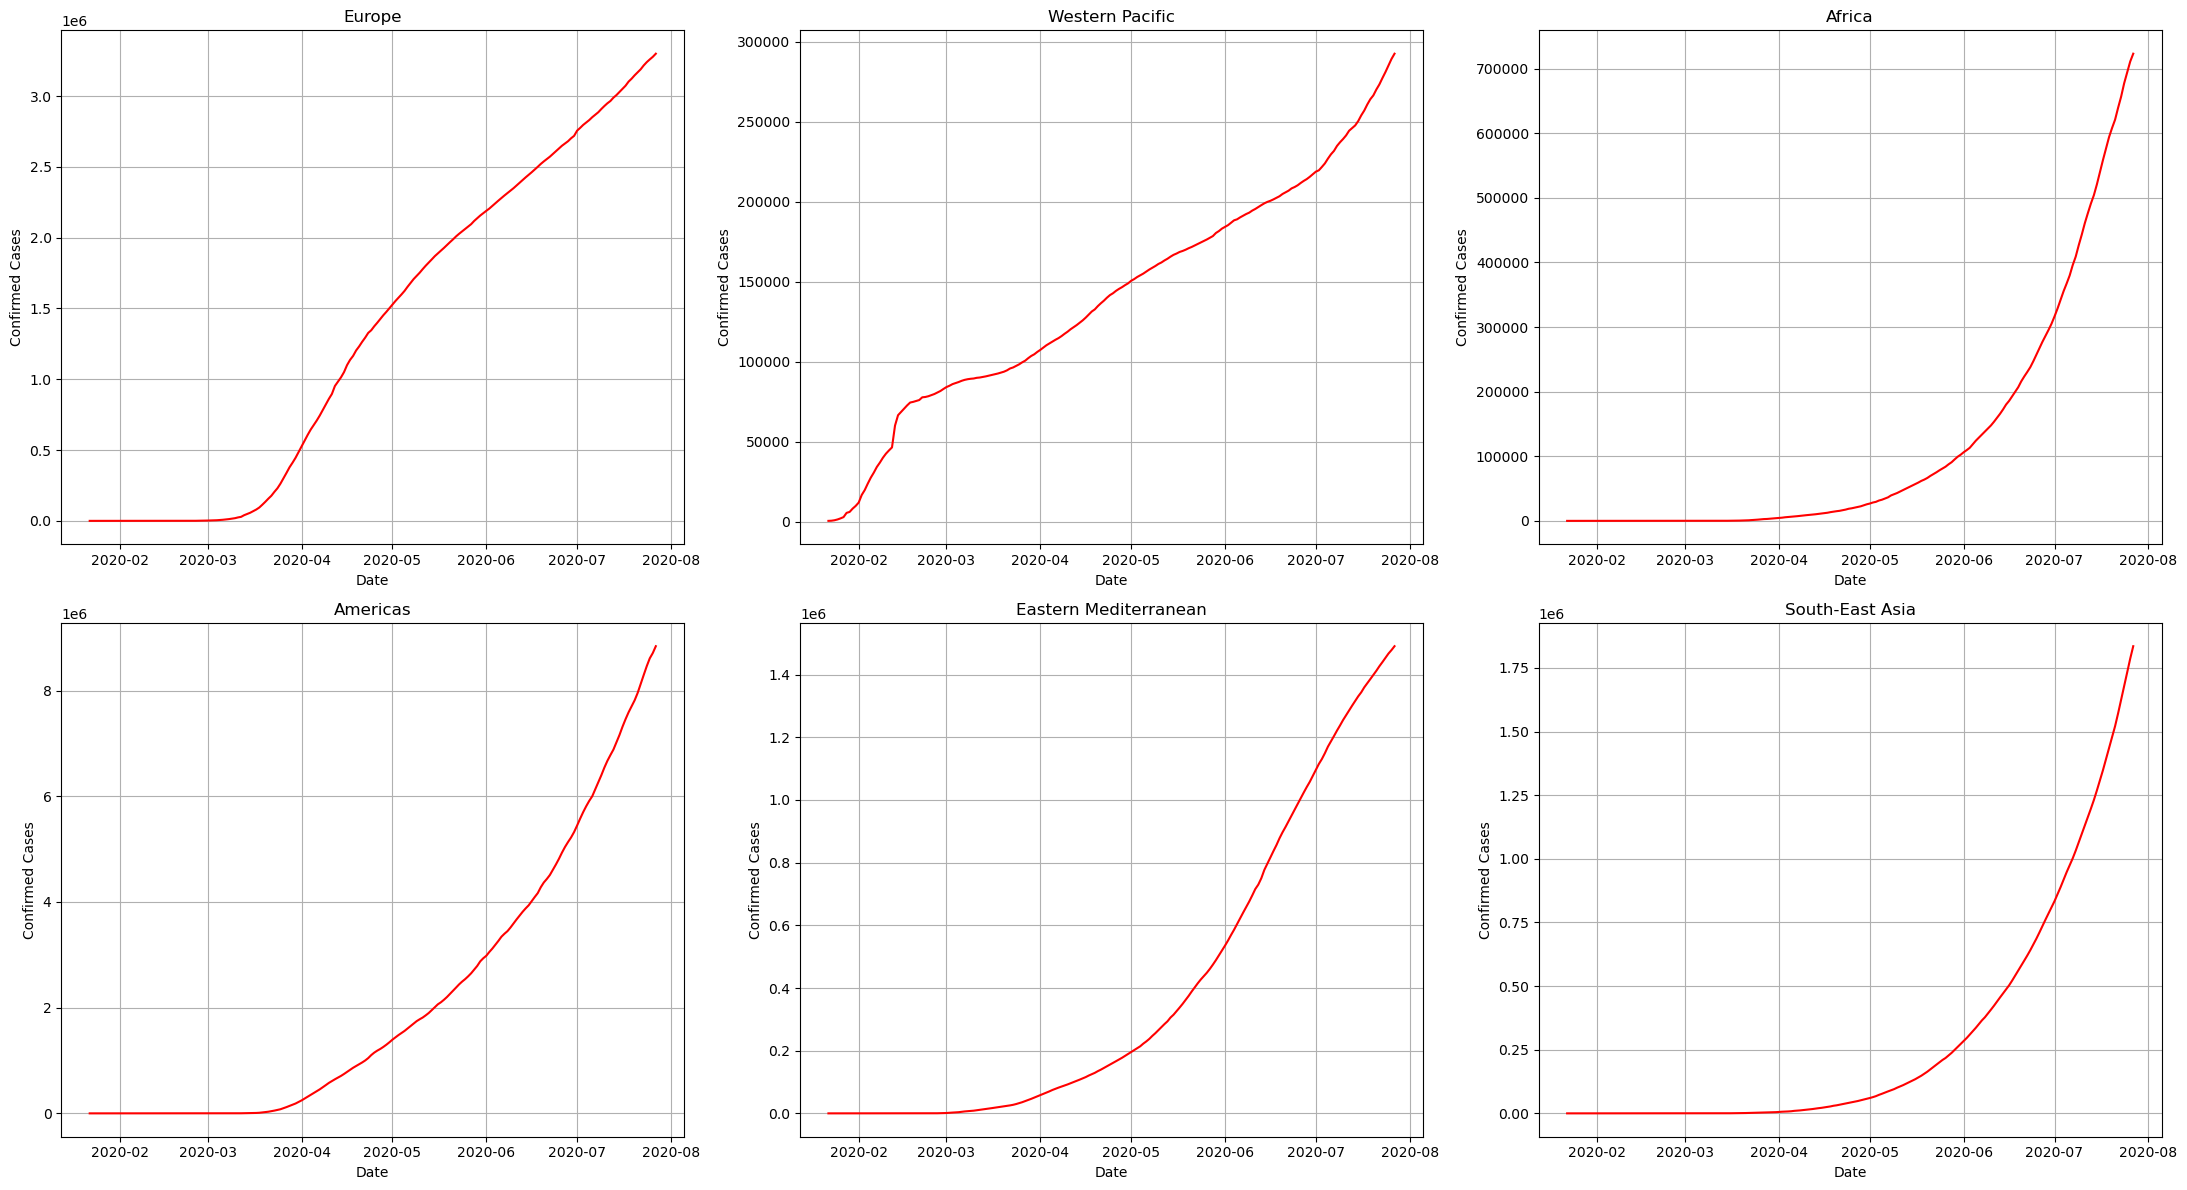

In [101]:
whos= df['WHO Region'].value_counts().index
fig, axes = plt.subplots(2,3, figsize=(22,12))
for ax ,i in zip(axes.flat, whos ):
    data = df[df['WHO Region']==i].groupby('Date')['Confirmed'].sum()
    sns.lineplot(x=data.index, y=data.values, ax=ax, color='red')
    ax.grid(True)
    ax.set_title(i)
    ax.set_ylabel("Confirmed Cases")

plt.tight_layout()
plt.show()

- almost all WHO Regions have identical rise of cases

-----------------

###  Heatmap accoriding to rise of confirmed cases over the months

In [ ]:
df['Month'] = df['Date'].dt.month
confirmed_who_month= df.groupby(['Month','WHO Region'])['Confirmed'].sum().reset_index()
confirmed_who_month = confirmed_who_month.pivot(index='WHO Region',columns='Month',values='Confirmed') #pivoting for heatmap
confirmed_who_month = confirmed_who_month/ 1000000 #scale down from millions fro interpretablity

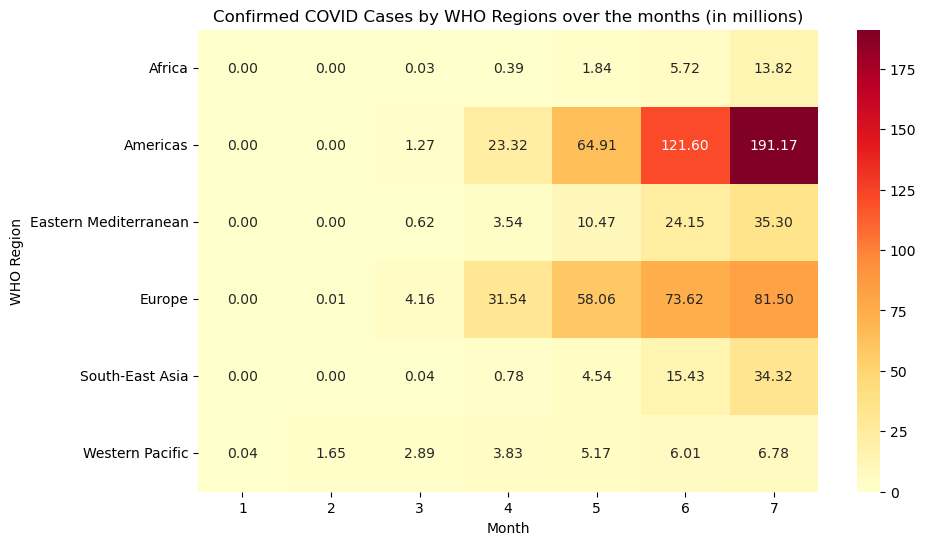

In [14]:
plt.figure(figsize=(10, 6))
sns.heatmap(confirmed_who_month, annot=True,fmt=".2f", cmap='YlOrRd')
plt.title("Confirmed COVID Cases by WHO Regions over the months (in millions)")
plt.show()

- The confirmed cases started escalating quickly during March, April and May

---------------

## Interactive Visualizations

### Chloropeth map by total confirmed cases 

In [114]:
last = df['Date'].max()
df_last = df[df['Date'] == last].groupby('Country/Region')['Confirmed'].sum().reset_index()
fig = px.choropleth(df_last, locations='Country/Region', locationmode='country names', color='Confirmed', color_continuous_scale='ylorrd', projection='natural earth',
                    title="World map colored by total confirmed cases ")
fig.show()

-------------------

In [113]:
top_data = df.groupby(['Country/Region'])['Confirmed'].sum().reset_index().nlargest(10, columns='Confirmed') #choosing the top 10 coutries
by_country=  df.groupby(['Country/Region', 'Date'])[['Confirmed']].sum().reset_index()
top_10 = by_country[by_country['Country/Region'].isin(top_data['Country/Region'])]
top_10['Month'] = top_10['Date'].dt.month

In [17]:
fig = px.bar(
    top_10.sort_values(by='Confirmed', ascending=True),
    x='Country/Region',
    y='Confirmed',
    color='Country/Region',
    animation_frame='Month',
    animation_group='Country/Region',
    range_y=[0, top_10['Confirmed'].max()],
    title='Confirmed Cases Over Time for the Top 10 countries'
    
)
fig.show()


### click the play button or drag the slider 
- The surge starts appearing from April.

---------------

### Interactive tree map

In [18]:
fig = px.treemap(
    df.groupby(['WHO Region', 'Country/Region'])['Confirmed'].sum().reset_index(),
    path=['WHO Region', 'Country/Region'],
    values='Confirmed',
    color='Confirmed',
    color_continuous_scale='ylorrd',
    title='Tree Map for Confirmed cases')

fig.show()


--------------

### Interactive scatter plot

In [108]:
df_last = df[df['Date'] == df['Date'].max()]
df_last = df_last.groupby('Country/Region')[['Confirmed', 'Recovered', 'Deaths']].sum().reset_index()
df_last['Death Rate'] = (df_last['Deaths']/df_last['Confirmed']) *100
df_last['Recovery Rate'] = (df_last['Recovered']/df_last['Confirmed']) *100

fig = px.scatter(
    df_last,
    x='Death Rate',
    y='Recovery Rate',
    size='Confirmed',
    color='Country/Region',
    hover_name='Country/Region',
    size_max=50,
    title = 'Death Rate vs Recovery Rate',
    )
fig.show()

- Top-left -> low Death Rate, High Recovery Rate (Qatar, Bahrain, Singapore etc)<br>
- Top right -> High Death Rate, High Recovery Rate (no countries) <br>
- Bottom Right -> High Death Rate, Low Recovery (UK, Netherlands, Canada)<br>
- Bottom left -> Low Death Rate, Low Recovery Rate(Namibia, Mozambique, Timor-Leste)


-------------------

## Forecasting & Evaluation

In [109]:
from prophet import Prophet #Easy to use and fast Forecasting model by Facebook 
from sklearn.metrics import root_mean_squared_error #for evaluation

- We willl be forecasting one week in future for all WHO Regions and evaluate each forecast

16:10:14 - cmdstanpy - INFO - Chain [1] start processing
16:10:14 - cmdstanpy - INFO - Chain [1] done processing
16:10:14 - cmdstanpy - INFO - Chain [1] start processing
16:10:14 - cmdstanpy - INFO - Chain [1] done processing
16:10:15 - cmdstanpy - INFO - Chain [1] start processing
16:10:15 - cmdstanpy - INFO - Chain [1] done processing
16:10:15 - cmdstanpy - INFO - Chain [1] start processing
16:10:15 - cmdstanpy - INFO - Chain [1] done processing
16:10:15 - cmdstanpy - INFO - Chain [1] start processing
16:10:15 - cmdstanpy - INFO - Chain [1] done processing
16:10:16 - cmdstanpy - INFO - Chain [1] start processing
16:10:16 - cmdstanpy - INFO - Chain [1] done processing


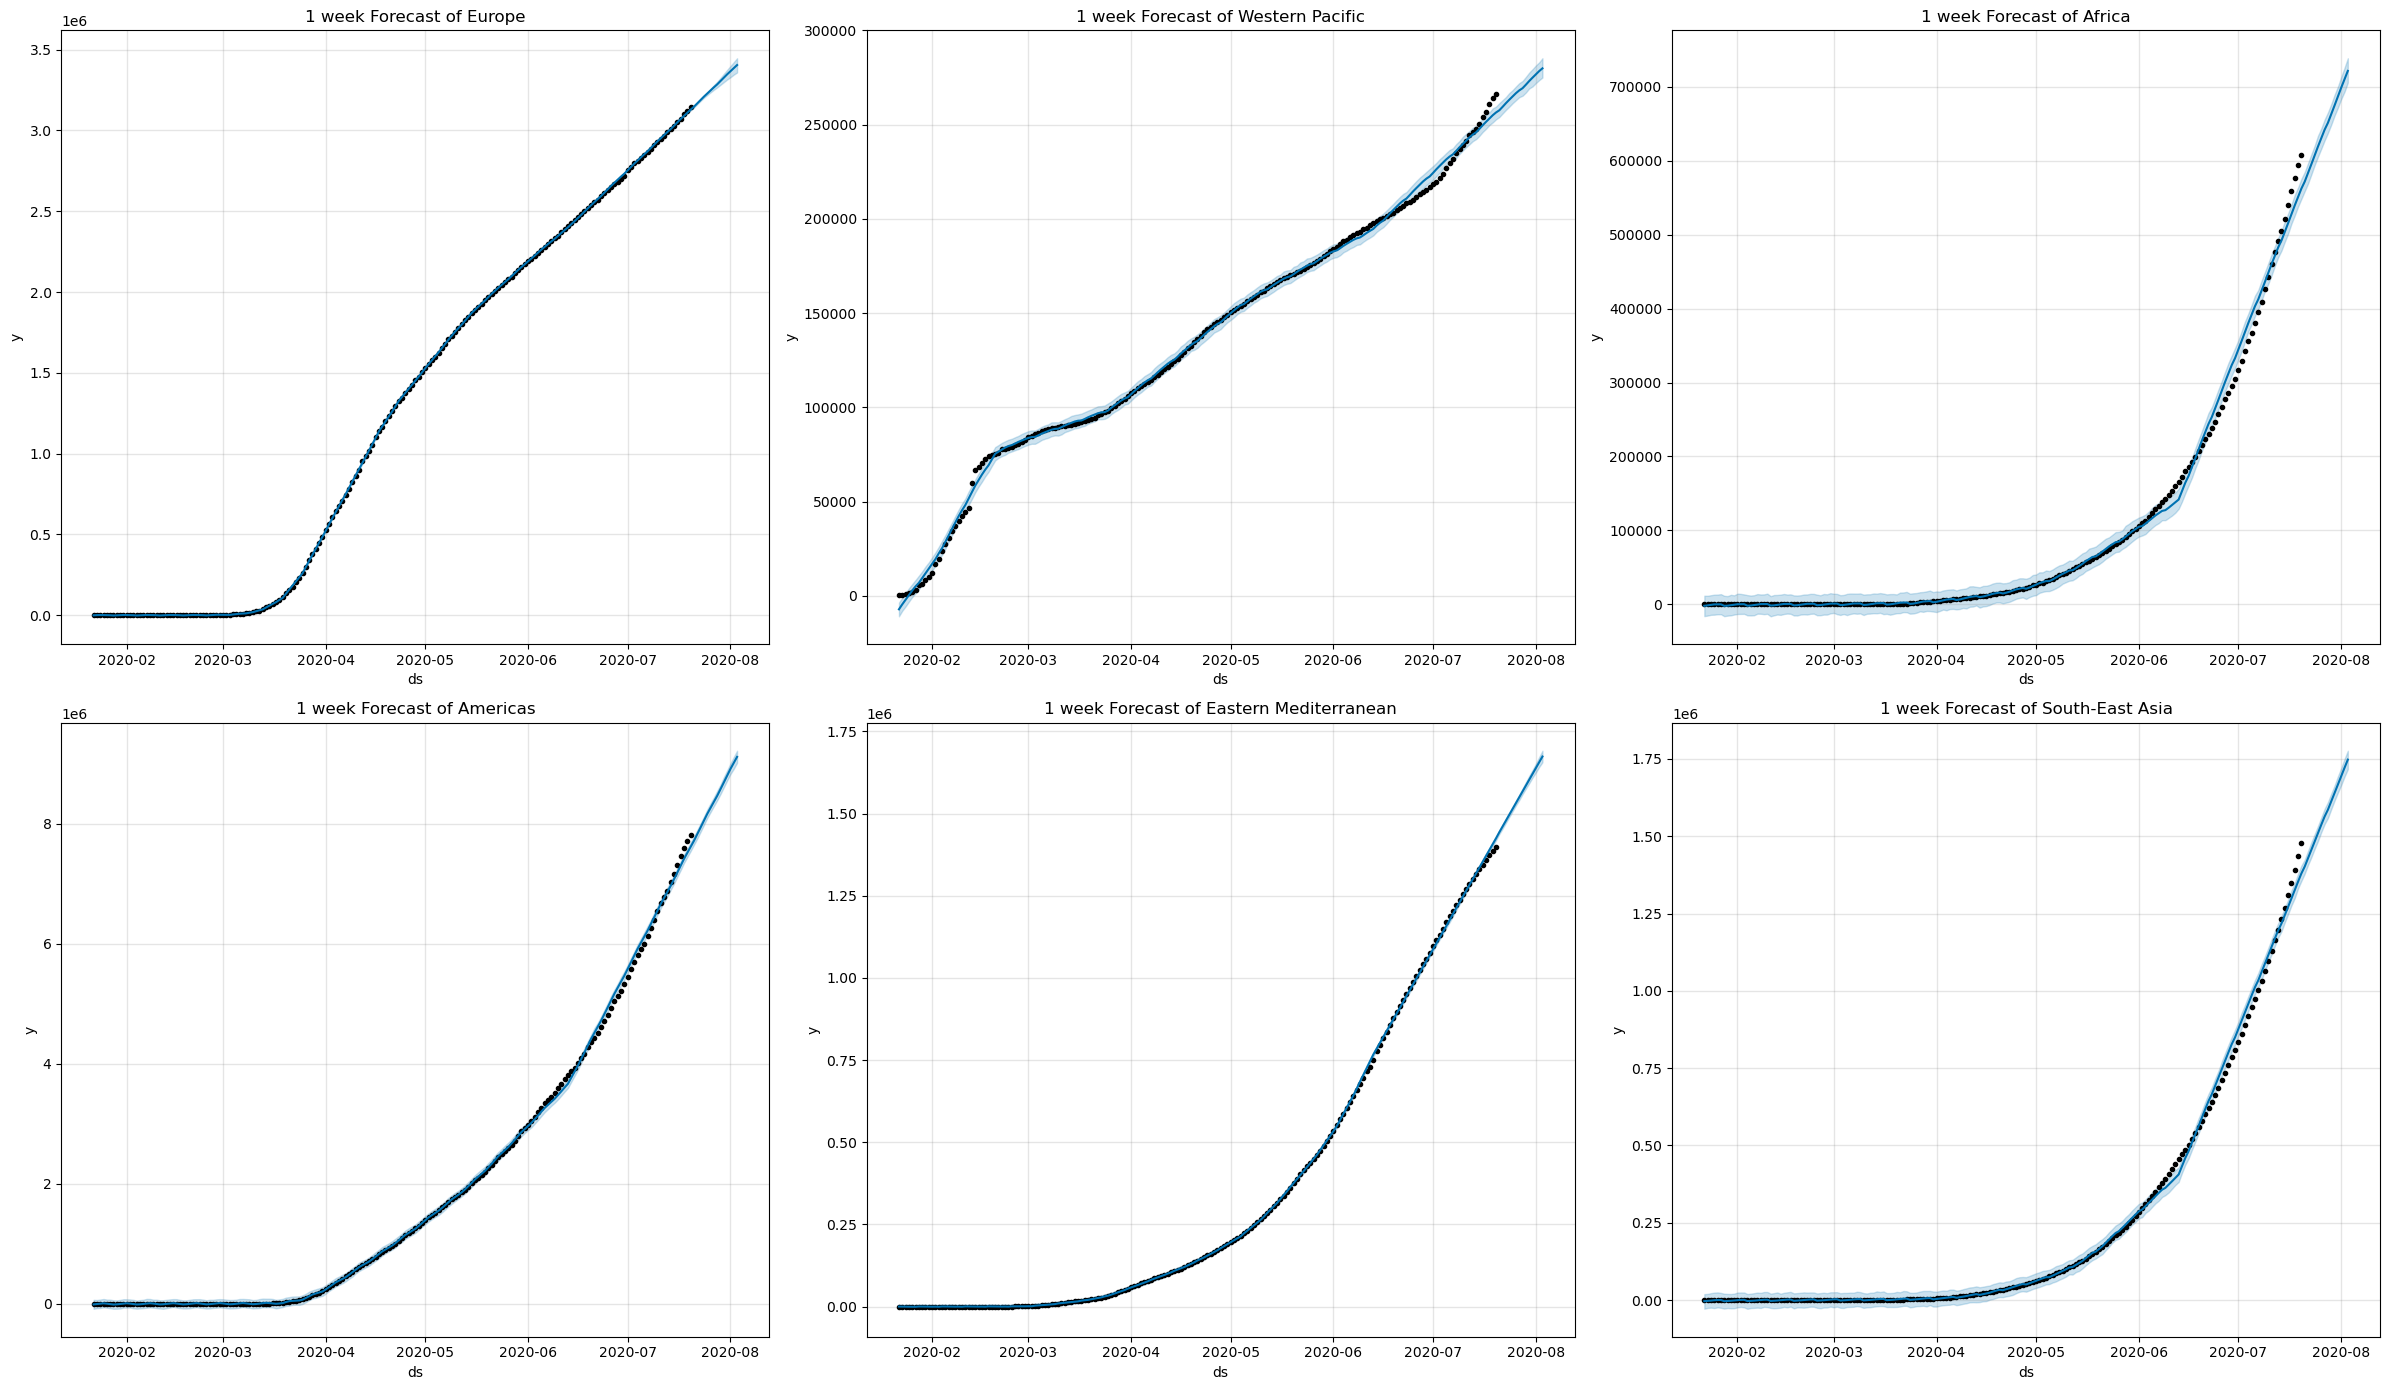

In [ ]:
fig, axes = plt.subplots(2,3, figsize=(24,14))
perf = []
for ax, i in zip(axes.flat, whos):

    #transforming data for model & evaluation
    who = df[df['WHO Region'] == i ][['Date', 'Confirmed']]
    who.rename(columns={'Date':'ds', 'Confirmed':'y'}, inplace=True)
    who = who.groupby('ds')['y'].sum().reset_index()
    train = who[:-7]  #all except last 7
    test = who[-7:] # only last 7

    #training model
    model = Prophet()
    model.fit(train)
    future = model.make_future_dataframe(periods=14, freq='D') #first 7 days for evaluation + last 7 days forecasting
    forecast = model.predict(future)
    model.plot(forecast, ax=ax)
    ax.grid(True)
    ax.set_title(f"1 week Forecast of {i}")

    #evaluation
    pred_forecast = forecast[forecast['ds'].isin(test['ds'])]
    avg_cases = test['y'].mean()
    perf.append((root_mean_squared_error(test['y'], pred_forecast['yhat'])/avg_cases)*100)
    


plt.tight_layout()
plt.show()

    

- looking good with little deviations in some.

--------------

## Performance comparison

In [95]:
pd.DataFrame({"WHO Region": whos, "error ±%": perf})

,WHO Region,error ±%
0,Europe,0.875298
1,Western Pacific,6.601213
2,Africa,10.198215
3,Americas,4.635189
4,Eastern Mediterranean,3.065380
5,South-East Asia,12.074131


- data of Europe was smooth and simple hence the low error
- the model had little difficulty generalizing to the data of Western Pacific
- South East Asia has the highest error with ±12 of deviation from the true values

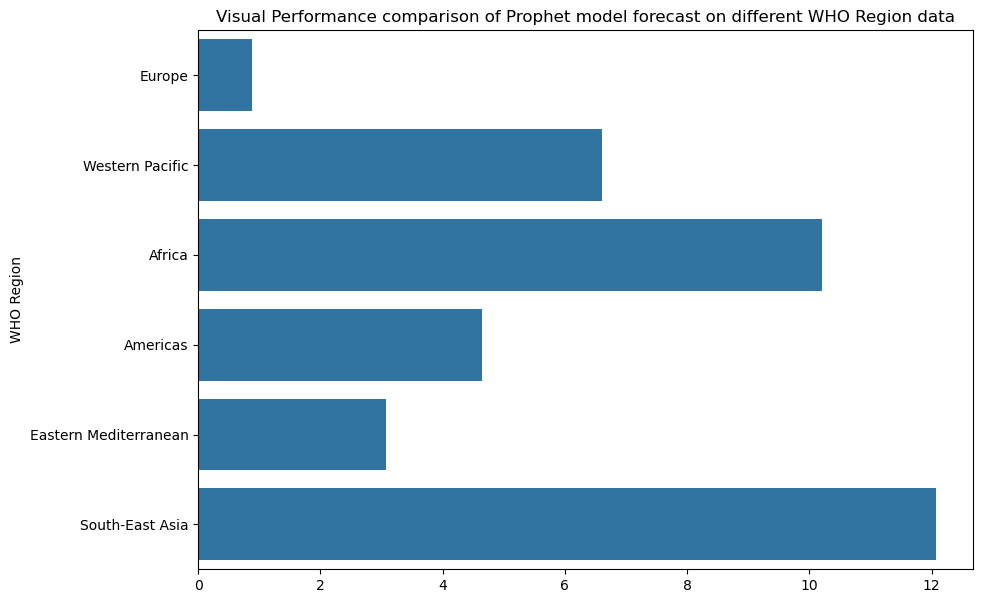

In [110]:
plt.figure(figsize=(10,7))
sns.barplot(x=perf, y=whos)
plt.title("Visual Performance comparison of Prophet model forecast on different WHO Region data")
plt.show()

----------

_If you have any suggestions to imporve the forecasting or any other improvements or corrections, feel free to contact me !_


📧 [LinkedIn](www.linkedin.com/in/rehan-shaikh-68153a246)

🔗 Email: rehansk.3107@gmail.com